# SLU09 - Classification With Logistic Regression: Exercise notebook

In [86]:
import pandas as pd 
import numpy as np 
import hashlib
import json
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import utils

You thought that you would get away without implementing your own little logistic regression? Hah! In this notebook, you will:
- implement one pass of maximum likelihood optimization in three steps: implement the estimated probability function, calculate the log-likelihood cost function, and calculate one iteration of the optimization
- standardize data manually
- use sklearn for the same steps: standardize data, train the classifier and output predictions

If you get completely lost at sea of linear algebra in some of these exercises, check out the hints at the end of the notebook.

### Exercise 1.1: Calculate the estimated probability

Recall the formula for the estimated probability for the logistic regression:

$$\hat{p} = \frac{1}{1 + e^{-z}}$$

Where z is the linear combination of the features $x_n$ and $\beta_n$ are the coefficients of the model:

$$z = \beta_0 + \beta_1 x_1 + ... + \beta_m x_n$$

Implement a function that calculates the estimated probability $\hat{p}$ for an observation. The inputs are two arrays, one with the features (x1, x2, ..., xm) and another with the model coefficients (b0, b1, .., bm). The output is the estimated probability for the given observation.

In [87]:
def predict_proba(data, coefs):
    """ 
    Function that returns the estimated probability for an observation.
    
    Args:
        data (np.array): a numpy array of shape (m) with the features
        coefs (np.array): a numpy array of shape (m + 1, 1) with model coefficients
            - coefs[0]: the intercept
            - coefs[1:]: the remaining coefficients

    Returns:
        proba (float): the estimated probability, value between 0 and 1.

    """

    # hint: if using array multiplication, don't forget to add a field 
    #       for the intercept to the features (like you did in SLU07)
    
    # YOUR CODE HERE
    
    data = np.concatenate(([1],data), axis=0)
    exp_z = np.exp(-np.sum(coefs*data))
    
    proba = 1/(1+exp_z)
    
    return proba

In [88]:
x = np.array([-1.2, -1.5])
coefficients = np.array([0, 4, -1])
np.testing.assert_almost_equal(round(predict_proba(x, coefficients), 3), 0.036)

x_1 = np.array([-1.5, -1, 3, 0])
coefficients_1 = np.array([0, 2.1, -1, 0.5, 0])
np.testing.assert_almost_equal(round(predict_proba(x_1, coefficients_1), 3), 0.343)

### Exercise 1.2: Compute the log-likelihood cost function

During the optimization of the model coefficients, you need to calculate the log-likelihood cost function: 

$$H_{\hat{p}}(y) = \sum_{i=1}^{N} \left [ y_i \log\left(\hat{p}_i(x_i,\beta)\right) + (1-y_i) \log\left(1-\hat{p}_i(x_i,\beta)\right) \right ]$$

where N is the number of observations, $y_i$ are the true class labels, $x_i$ the feature vector of the ith observation, and $\beta$ are the model coefficients.

In this exercise, you will calculate the cost function for the given dataset. The inputs are an array of the feature vectors, an array of the model coefficients, and an array of the true class labels. You can use the function above or calculate everything from scratch, in which case it will be easier if you still remember how to multiply matrices. :)

In [89]:
def log_likelihood_cost_function(var_x, coefs, var_y):
    """ 
    Function that calculates log-likelihood for the given dataset
    
    Args:
        var_x (np.array): array with the features of the training data of size (n, m)
                   where n is the number of observations and m the number of features
        coefs (float64): an array with the model coefficients of size (1, m+1)
        var_y (float64): an array with the true class labels of size (n, 1)
        
    Returns:
        cost (np.float): a float with the resulting log-likelihood for the dataset

    """
   
    # YOUR CODE HERE
    # Append a column of ones to var_x for the intercept term
    intercept = np.ones((var_x.shape[0], 1))
    var_x = np.hstack((intercept, var_x))

    # Calculate the predicted probabilities
    z = np.dot(var_x, coefs.T)
    p = 1 / (1 + np.exp(-z))

    # Calculate the log-likelihood
    log_likelihood = np.sum(var_y * np.log(p) + (1 - var_y) * np.log(1 - p))
    cost = log_likelihood
    return cost

In [90]:
x = np.array([[-2, -2], [3.5, 0], [6, 4]])
coefficients = np.array([[0 ,2, -1]])
y = np.array([[1],[1],[0]])
np.testing.assert_almost_equal(round(log_likelihood_cost_function(x, coefficients, y),2),-10.13,1)
coefficients_1 = np.array([[3 ,4, -0.6]])
x_1 = np.array([[-4, -4], [6, 0], [3, 2], [4, 0]])
y_1 = np.array([[0],[1],[0],[1]])
np.testing.assert_almost_equal(round(log_likelihood_cost_function(x_1, coefficients_1, y_1),2),-13.8,1)

### Exercise 1.3: Compute one iteration of the gradient descent

Now that we know how to calculate probabilities and the cost function, let's do an interesting exercise - compute the first iteration of the gradient descent for the given dataset according to the update rule

$$\beta_{t+1} = \beta_t + learning\_rate*\sum_{i=1}^{N}  \left[ x_i \left(y_i-\hat{p}_i(x_i,\beta_t)\right) \right] $$

Write a function that takes as arguments the training data and the learning rate and outputs the model coefficients $\beta$ after one iteration of the gradient descent. Initialize the coefficients with 0 like this:
```python
coefficients = np.zeros(m + 1)
```
where m is the number of features of the model. Before you start, think for a moment about the dimensions of the terms in the sum that you need to multiply. Writing it down on paper helps. :)

In [91]:
def compute_coefs_sgd(x_train, y_train, learning_rate = 0.1, verbose = False):
    """ 
    Implementation of a function that returns the a first iteration of 
    stochastic gradient descent.

    Args:
        x_train (np.array): a numpy array of shape (m, n)
            m: number of training observations
            n: number of variables
        y_train (np.array): a numpy array of shape (m,) with 
        the real value of the target.
        learning_rate (np.float64): a float

    Returns:
        coefficients (np.array): a numpy array of shape (n+1,)

    """
    
    # A list of hints that might help you:
    
    # 1. Calculate the number of observations
    
    # 2. Initialize the coefficients array with zeros
            # hint: use np.zeros()    
    
    # 3. Run the stochastic gradient descent and update the coefficients after each observation    
        # 3.1 Compute the predicted probability - you can use a function we have done previously 
        # 3.2 Update intercept
        # 3.3 Update the rest of the coefficients by looping through each variable
    coefs = np.zeros(x_train.shape[1]+1)

    
    for x, y in zip(x_train, y_train):
        proba = predict_proba(x, coefs)
        b_0 = coefs[0]+learning_rate*((y-proba)*proba*(1-proba))
        new_coefs = np.array(coefs[1:]+learning_rate*((y-proba)*proba*(1-proba))*x)
        coefficients = np.concatenate(([b_0], new_coefs))
    
    return coefficients

In [11]:
#def compute_coefs_gd(x_train, y_train, learning_rate = 0.1, verbose = False):
#    """ 
#    Function that calculates the logistic regression coefficients 
#    after the first iteration of gradient descent.
#
#    Args:
#        x_train (np.array): a numpy array with features of shape (n, m)
#            n: number of training observations
#            m: number of features
#        y_train (np.array): a numpy array with the true class labels of shape (n, )
#        learning_rate (np.float64): learning rate for the optimization
#
#    Returns:
#        coefficients (np.array): a numpy array of updated model coefficients of shape (m+1, )
#
#    """
#    
#    # YOUR CODE HERE
#    n, m = x_train.shape
#    coefficients = np.zeros(m + 1)
#
#    # Add a column of ones to x_train for the intercept term
#    intercept = np.ones((n, 1))
#    x_train = np.hstack((intercept, x_train))
#
#    # Calculate the predicted probabilities
#    z = np.dot(x_train, coefficients)
#    p = 1 / (1 + np.exp(-z))
#
#    # Compute the gradient
#    gradient = np.dot(x_train.T, (y_train - p))
#
#    # Update the coefficients
#    coefficients += learning_rate * gradient
#
#    if verbose:
#        print("Updated coefficients:", coefficients)
#
#    return coefficients


In [92]:
#Test 1
x_train = np.array([[5.5,2.3,4.0,1.3], [6.9,3.1,4.9,1.5], [7.3,2.9,6.3,1.8], [6.4,2.8,5.6,2.1]])
y_train = np.array([0,0,1,1])
learning_rate = 0.1
x_standard=StandardScaler().fit_transform(x_train)
coef=compute_coefs_gd(x_standard, y_train, learning_rate)

assert len(coef)==x_train.shape[1] + 1, "The length of the coefficient array is not correct."
np.testing.assert_almost_equal(round(coef[0],3),0)
np.testing.assert_almost_equal(round(coef[1],3),0.097)
np.testing.assert_almost_equal(round(coef[2],3),0.051)
np.testing.assert_almost_equal(round(coef[3],3),0.176)
np.testing.assert_almost_equal(round(coef[4],3),0.181)

#Test 2
x_train_1 = np.array([[6.7,3.0,5.2,2.3], [6.3,2.5,5.0,1.9], [7.7,3.8,6.7,2.2], [7.7,2.6,6.9,2.3],
                      [6.0,2.7,5.1,1.6], [5.4,3.0,4.5,1.5], [6.3,3.3,4.7,1.6], [4.9,2.4,3.3,1.0]])
y_train_1 = np.array([0,0,0,0,1,1,1,1])
learning_rate = 0.1
x_1_standard = StandardScaler().fit_transform(x_train_1)
coef1 = compute_coefs_gd(x_1_standard, y_train_1, learning_rate)

np.testing.assert_almost_equal(round(coef1.max(), 3), 0.)
np.testing.assert_almost_equal(round(coef1.min(), 3), -0.349)
np.testing.assert_almost_equal(round(coef1.mean(), 3), -0.2)
np.testing.assert_almost_equal(round(coef1.var(), 3), 0.02)

 ### Exercise 2: Standardize data

To get this concept in your head, let's do a quick and easy function to standardize the data. Recall that standardized data have zero mean and unit variance:

$$ x_{standardized} = \frac{x - mean\ (x)}{std\ (x)}$$

Don't forget that the `axis` argument is critical when obtaining the mean values!

Implement the function to standardize given data below. The input is an array of features and the output is an array of the same size with the standardized features.

In [13]:
def standardize_data_function(data):
    """ 
    Function that standardizes the features
    
    Args:
        data (np.array): a numpy array with observations of shape (n, m)
            n: number of observations
            m: number of features

    Returns:
        standardized_data (np.array): a numpy array with standardized features of shape (n, m)

    """
   
    # YOUR CODE HERE

    # Calculate the mean and standard deviation for each feature
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Standardize the data
    standardized_data = (data - mean) / std

    return standardized_data


In [14]:
data = np.array([[7,7,3], [2,2,11], [9,5,2], [0,9,5], [10,1,3], [1,5,2]])
standardized_data = standardize_data_function(data)
print('Before standardization:')
print(data)
print('\n-------------------\n')
print('After standardization:')
print(standardized_data)

Before standardization:
[[ 7  7  3]
 [ 2  2 11]
 [ 9  5  2]
 [ 0  9  5]
 [10  1  3]
 [ 1  5  2]]

-------------------

After standardization:
[[ 0.54498835  0.79262399 -0.42399915]
 [-0.71267707 -1.03650829  2.11999576]
 [ 1.04805452  0.06097108 -0.74199852]
 [-1.21574324  1.5242769   0.21199958]
 [ 1.29958761 -1.40233475 -0.42399915]
 [-0.96421016  0.06097108 -0.74199852]]


In [15]:
data = np.array([[2,2,11,1], [7,5,1,3], [9,5,2,6]])
standardized_data = standardize_data_function(data)
np.testing.assert_almost_equal(round(standardized_data.mean(), 0), 0.)
np.testing.assert_almost_equal(round(standardized_data.var(axis = 0).mean(), 0), 1.)
np.testing.assert_almost_equal(round(standardized_data.min(), 3), -1.414)
np.testing.assert_almost_equal(round(standardized_data.max(), 3), 1.408)

data1 = np.array([[1,3,1,3], [9,5,3,1], [2,2,4,6]])
standardized_data1 = standardize_data_function(data1)
np.testing.assert_almost_equal(round(standardized_data1.mean(), 0), 0.)
np.testing.assert_almost_equal(round(standardized_data1.var(axis = 0).mean(), 0), 1.)
np.testing.assert_almost_equal(round(standardized_data1.min(), 3), -1.336)
np.testing.assert_almost_equal(round(standardized_data1.max(), 3), 1.405)

### Exercise 3.1: Train a logistic regression classifier with `sklearn`

Finally, we're getting to use `sklearn`! You will train a logistic regression classifier to distinguish two varieties of raisins, Kecimen and Besni, based on their size and shape. The raisins were photographed and features describing their size and shape were extracted from the images. The original dataset is available [here](https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset). Take a look at the dataset. `Class` indicates raisin variety with True for Kecimen and False for Besni. All the other columns are size and shape features.

In [6]:
# We will load the dataset for you
raisins = pd.read_csv('data/raisins_dataset.csv')
raisins.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,True
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,True
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,True
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,True
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,True


In [18]:
raisins.shape

(900, 8)

In [19]:
raisins.drop('Class', axis=1).columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'],
      dtype='object')

Implement a function that will train a sklearn logistic regression model on the `raisins` dataset. It should return the classifier instance, the probabilities for the raisins to be of the Kecimen variety, and the coefficients of the model including the intercept.

- use all available features to train the model
- use `Class` as the target
- standardize the features
- fit a logistic regression for a maximum of 100 iterations and random state = 100 (look in the API reference for the necessary parameters)

The input of the function is the `raisins` dataset. The output is the classifier, an array of probabilities, an array of model coefficients, and the model intercept. Notice that the target is encoded as True/False - sklearn will understand this. Make sure to return the probabilities of the positive class (the probability of each raisin to be of the Kecimen variety). Read the documentation to see how the classifier outputs the probabilities.

In [26]:
from sklearn.linear_model import LogisticRegression

def train_model_sklearn(dataset):
    '''
    Fits logistic regression to the raisins dataset
    and returns the classifier instance, the probabilities, the model coefficients and the intercept.
    
    Args:
        dataset(pd.DataFrame): training dataset
    
    Returns:
        clf: the classifier
        probas (np.array): Array of floats with the probability 
                           of each raisin being of the Kecimen variety
        coefficients (np.array): coefficients of the trained logistic regression.
        intercept (np.array): intercept of the trained logistic regression          
    '''
    
    # YOUR CODE HERE
    # Separate the features and the target
    X = dataset.drop('Class', axis=1)
    y = dataset['Class']

    # Standardize the features
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Create and fit the logistic regression model
    clf = LogisticRegression(max_iter=100, random_state=100)
    clf.fit(X_standardized, y)

    # Retrieve the probabilities of the positive class (Kecimen variety)
    probas = clf.predict_proba(X_standardized)[:, 1]

    # Get the coefficients and intercept
    coefficients = clf.coef_[0].reshape(1, -1)
    intercept = clf.intercept_
    
    return clf, probas, coefficients, intercept
    

In [29]:
lr, probas, coef, intercept = train_model_sklearn(raisins)

assert str(lr)=='LogisticRegression(random_state=100)',"Did you use the correct classifier?"

# Testing Probas
np.testing.assert_almost_equal(round(probas.max()), 1), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas.min()), 0), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas.mean(),3), 0.500, 2), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas.std(),5), 0.36992, 3), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas.sum())*0.001, 0.450, 3), "Something is wrong with your probabilities."

# Testing Coefs
assert coef.shape==(1,7), 'Wrong number of coefficients. Did you select the features correctly?'
np.testing.assert_almost_equal(round(coef.max(),3), 0.733, 2), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef.min(),3), -2.333, 2), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef.mean(),4), -0.4395, 3), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef.var(),4), 0.7687, 3), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef.sum(),4), -3.0768, 3), "Something is wrong with your model coefficients."

assert hashlib.sha256(json.dumps(str(round(intercept[0],3))).encode()).hexdigest()=='ad5db3ccd28d807e79ebc49fcb89236070829c4145ec1ff8db72b06b06bcb350',"Something is wrong with your intercept"

### Exercise 3.2: Decision boundary

In general, the decision boundary in binary logistic regression is a hyperplane of dimension m - 1 in the feature space, with m being the number of features. You can imagine this in 3D: it's like a cloud of observations cut with a decision boundary knife. Recall that you can derive the equation for this hyperplane from the logistic regression formula.

For the classification model from exercise 3.1, calculate the value of the feature `Perimeter` on the decision boundary given the values of the other six features. Return it as a float of the same name. The values of the other six features are given below.

In [55]:
# the features were scaled that's why the negative numbers
Area = 1.94
MajorAxisLength = 2.31
MinorAxisLength = 0.92
Eccentricity = -0.73
ConvexArea = 3.45
Extent = -2.78

In [59]:
# YOUR CODE HERE
clf, probas, coefficients, intercept = train_model_sklearn(raisins)
beta = [intercept[0]]+coefficients.tolist()[0]
len(beta)

8

In [60]:
# Calculate Perimeter
Perimeter = -(beta[0] + beta[1] * Area + beta[2] * MajorAxisLength + beta[3] * MinorAxisLength + beta[4] * Eccentricity + beta[5] * ConvexArea + beta[6] * Extent) / beta[7]


In [61]:
assert isinstance(Perimeter, float), 'Perimeter should be a float, not an array'
assert hashlib.sha256(json.dumps(str(round(Perimeter, 1))).encode()).hexdigest()=='81cb0c0ea658f6d9b2de914a4cc2b72fb79b1f3453e18c843ccb64e6bc7b4aa6',"Not correct, try again."

### Exercise 3.3: Logistic regression with less features

Train another logistic regression for the `raisins` dataset, but use only two features, `MinorAxisLength` and `Perimeter`. As before, use max 100 iterations and set random_state to 100. Standardize the features.

The input of the function is the `raisins` dataset. The output is the classifier, an array of probabilities of the positive class (the probability of each raisin to be of the Kecimen variety), an array of model coefficients, and the model intercept.

In [65]:
def train_model_sklearn_2_features(dataset):
    '''
    Fits logistic regression to selected features of the raisins dataset
    and returns the classifier, the probabilities, the model coefficients and the intercept.
    Uses the features MinorAxisLength and Perimeter.
    
    Args:
        dataset(pd.DataFrame): training dataset
    
    Returns:
        clf: the classifier
        probas (np.array): Array of floats with the probability 
                           of each raisin being the Kecimen variety
        coefficients (np.array): coefficients of the trained logistic regression.
        intercept (np.array): intercept of the trained logistic regression          
    '''
    
    # YOUR CODE HERE
    # Select only the 'MinorAxisLength' and 'Perimeter' features
    X = dataset[['MinorAxisLength', 'Perimeter']]
    y = dataset['Class']

    # Standardize the features
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Create and fit the logistic regression model
    clf = LogisticRegression(max_iter=100, random_state=100)
    clf.fit(X_standardized, y)

    # Retrieve the probabilities of the positive class (Kecimen variety)
    probas = clf.predict_proba(X_standardized)[:, 1]

    # Get the coefficients and intercept
    coefficients = clf.coef_[0].reshape(1, -1)
    intercept = clf.intercept_

    return clf, probas, coefficients, intercept
  
    

In [66]:
lr2, probas2, coef2, intercept2 = train_model_sklearn_2_features(raisins)

assert str(lr2) == 'LogisticRegression(random_state=100)', "Did you use the correct classifier?"

# Testing Probas
np.testing.assert_almost_equal(round(probas2.max()), 1), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas2.min()), 0), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas2.mean(), 1), 0.5, 1), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas2.std(), 5), 0.36578, 3), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas2.sum()) * 0.001, 0.450, 3), "Something is wrong with your probabilities."

# Testing Coefs
assert coef2.shape == (1, 2), 'Wrong number of coefficients. Did you select the features correctly?'
np.testing.assert_almost_equal(round(coef2.mean(), 3), -1.465, 2), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef2.var(), 5), 5.98857, 3), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef2.sum(), 3), -2.931, 2), "Something is wrong with your model coefficients."

assert hashlib.sha256(json.dumps(str(round(intercept2[0], 2))).encode()).hexdigest() == '90248082ff854cb0699ef9c82c9514d456a536e4092bb1fd69e72e446dfc8cbd',"Something is wrong with your intercept"

correct1, correct2 = utils.compare_classifiers(lr,lr2,raisins.drop(columns = ['Class']),
                          raisins[['MinorAxisLength', 'Perimeter']], raisins.Class)
print("The 7-feature model classified %d out of %d raisins correctly." % (correct1, raisins.shape[0]))
print("The 2-feature model classified %d out of %d raisins correctly." % (correct2, raisins.shape[0]))

The 7-feature model classified 780 out of 900 raisins correctly.
The 2-feature model classified 779 out of 900 raisins correctly.


As you can see, both models performed similarly well. It is because most of the features have little influence on the outcome. The most important feature is `Perimeter`. You can see it on the size of the corresponding model coefficient (uncomment and run the cell below). Selection of features and their importance for the model predictions will be discussed in SLU14.

In [ ]:
# uncomment this cell to see the coefficients
# The higher is the absolute value of the coefficient, the more it influences the model predictions.
# The order of the coefficients is the same as the order of features input into the model.
#print('7-features model coefficients')
#print(coef)
#print('2-features model coefficients')
#print(coef2)

In [67]:
print('7-features model coefficients')
print(coef)
print('2-features model coefficients')
print(coef2)

7-features model coefficients
[[-0.48203967 -0.57206185  0.73334898 -0.17130059 -0.38145099  0.12999896
  -2.33328061]]
2-features model coefficients
[[ 0.98179627 -3.91251511]]


Here is a plot of the datapoints and the decision boundary for the 2-feature model (with scaled features). We can't plot the result for the 7-feature model, the boundary cannot be projected into 2d space. Think about why!

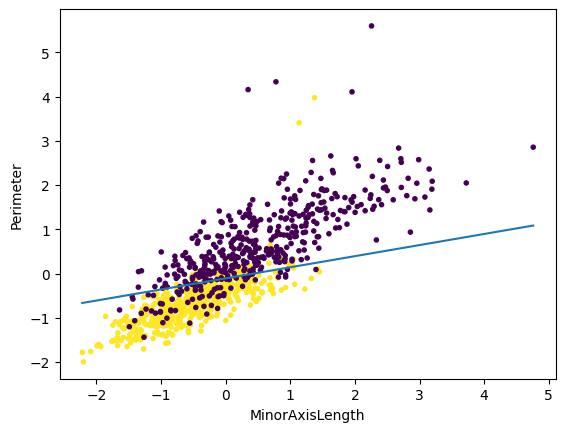

In [68]:
utils.plot_exercise_boundary(raisins, ['MinorAxisLength', 'Perimeter'], raisins.Class)

Congratulations, you've learned to train your first classifier! But how good is your model at predicting the 
outcome? You will learn how to evaluate model performance using metrics in the next SLU!

We have one more optional ungraded exercise below if you'd like to practice more. It is the same as exercise 3, just with another dataset.

<img src="https://imgs.xkcd.com/comics/machine_learning.png">

### Exercise 4.1 - optional, ungraded

The dataset for this exercise is the dependency of cannabis use on personality measures - neuroticism, extraversion, openness to experience, agreeableness, conscientiousness, impulsivity, and sensation seeking. It is a subset of [this dataset](https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci).

In [69]:
cannabis = pd.read_csv('data/cannabis_consumption.csv')
cannabis.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,False
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,False
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,True
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,False
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,True


In [70]:
cannabis.shape

(1884, 14)

In [71]:
cannabis.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Cannabis'],
      dtype='object')

In [73]:
cannabis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   Ascore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Cannabis   1884 non-null   bool   
dtypes: bool(1), float64(7), int64(1), object(5)
memory usage: 193.3+ KB


Implement a function that will train a `sklearn` logistic regression model on the `cannabis` dataset. It should return the classifier instance, the probabilities of cannabis use, and the coefficients of the model including the intercept.

- use only the numerical features to train the model (Nscore, Escore, Oscore, Ascore, Cscore, Impulsive, SS)
- use `Cannabis` as the target which is `True` for use in the past year
- standardize the features
- fit a logistic regression for a maximum of 100 iterations and random state = 100

The input of the function is the `cannabis` dataset. The output is the classifier, an array of probabilities, an array of model coefficients, and the model intercept. Make sure to return the probabilities of the positive class (the probability of cannabis use in the past year).

In [80]:
def train_model_sklearn_cannabis(dataset):
    '''
    Fits logistic regression to the cannabis dataset
    using the numerical features Nscore, Escore, Oscore, Ascore, Cscore, Impulsive, SS
    and returns the classifier instance, the probabilities, the model coefficients and the intercept.
    
    Args:
        dataset(pd.DataFrame): training dataset
    
    Returns:
        clf: the classifier
        probas (np.array): array of floats with the probability 
                           of cannabis use in the past year
        coefficients (np.array): coefficients of the trained logistic regression.
        intercept (np.array): intercept of the trained logistic regression          
    '''
    
    # YOUR CODE HERE
    # YOUR CODE HERE
    # Select the specified numerical features
    #features = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
    #X = dataset[features]
    # Select numerical features (int, float)
    X = dataset.select_dtypes(include=['float64'])
    
    # Exclude non-feature columns if necessary (like 'ID')
    # X = X.drop(['ID'], axis=1)
    y = dataset['Cannabis']

    # Standardize the features
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Create and fit the logistic regression model
    clf = LogisticRegression(max_iter=100, random_state=100)
    clf.fit(X_standardized, y)

    # Retrieve the probabilities of cannabis use in the past year
    probas = clf.predict_proba(X_standardized)[:, 1]

    # Get the coefficients and intercept
    coefficients = clf.coef_[0].reshape(1, -1)
    intercept = clf.intercept_


    return clf, probas, coefficients, intercept
    

In [81]:
lr_can, probas_can, coef_can, intercept_can = train_model_sklearn_cannabis(cannabis)

assert str(lr_can) == 'LogisticRegression(random_state=100)', "Did you use the correct classifier?"

# Testing Probasa
np.testing.assert_almost_equal(round(probas_can.max()), 1), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas_can.min(), 5), 0.00993, 3), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas_can.mean(), 5), 0.46975, 3), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas_can.std(), 5), 0.27543, 3), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas_can.sum()) * 0.001, 0.885, 3), "Something is wrong with your probabilities."

# Testing Coefs
assert coef_can.shape == (1, 7), 'Wrong number of coefficients. Did you select the features correctly?'
np.testing.assert_almost_equal(round(coef_can.max(), 3), 0.477, 2), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef_can.min(), 5), -0.90780, 3), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef_can.mean(), 5), -0.08774, 3), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef_can.var(), 3), 0.251, 2), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef_can.sum(), 3), -0.614, 2), "Something is wrong with your model coefficients."

assert hashlib.sha256(json.dumps(str(round(intercept_can[0], 3))).encode()).hexdigest() == 'a3251684a60052de243146a079bd8615c090c8ba312602a6f99bad546bec8ba9',"Something is wrong with your intercept"

### Exercise 4.2 - optional ungraded

Now train another logistic regression model on the same target using only the Oscore and SS features.

In [82]:
def train_model_sklearn_2_features_cannabis(dataset):
    '''
    Fits logistic regression to selected features of the cannabis dataset
    and returns the classifier, the probabilities, the model coefficients and the intercept.
    Uses the features Oscore and SS.
    
    Args:
        dataset(pd.DataFrame): training dataset
    
    Returns:
        clf: the classifier
        probas (np.array): array of floats with the probability 
                           of cannabis use in the past year
        coefficients (np.array): coefficients of the trained logistic regression.
        intercept (np.array): intercept of the trained logistic regression          
    '''
    
    # YOUR CODE HERE
    # Select the specified numerical features
    features = ['Oscore', 'SS']
    X = dataset[features]

    # Exclude non-feature columns if necessary (like 'ID')
    # X = X.drop(['ID'], axis=1)
    y = dataset['Cannabis']

    # Standardize the features
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Create and fit the logistic regression model
    clf = LogisticRegression(max_iter=100, random_state=100)
    clf.fit(X_standardized, y)

    # Retrieve the probabilities of cannabis use in the past year
    probas = clf.predict_proba(X_standardized)[:, 1]

    # Get the coefficients and intercept
    coefficients = clf.coef_[0].reshape(1, -1)
    intercept = clf.intercept_

    return clf, probas, coefficients, intercept

    

In [83]:
lr_can2, probas_can2, coef_can2, intercept_can2 = train_model_sklearn_2_features_cannabis(cannabis)

assert str(lr_can2) == 'LogisticRegression(random_state=100)', "Did you use the correct classifier?"

# Testing Probas
np.testing.assert_almost_equal(round(probas_can2.max(), 3), 0.975, 2), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas_can2.min(), 4), 0.0209, 3), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas_can2.mean(), 4), 0.4697, 2), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas_can2.std(), 4), 0.2508, 3), "Something is wrong with your probabilities."
np.testing.assert_almost_equal(round(probas_can2.sum()) * 0.001, 0.885, 3), "Something is wrong with your probabilities."

# Testing Coefs
assert coef_can2.shape == (1, 2), 'Wrong number of coefficients. Did you select the features correctly?'
np.testing.assert_almost_equal(round(coef_can2.mean(), 3), -0.773, 2), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef_can2.var(), 5), 0.01275, 3), "Something is wrong with your model coefficients."
np.testing.assert_almost_equal(round(coef_can2.sum(), 3), -1.547, 2), "Something is wrong with your model coefficients."

assert hashlib.sha256(json.dumps(str(round(intercept_can2[0], 2))).encode()).hexdigest() == '2c166a03f5d797741a30f163766b3a052ec21f52c10c6fefbd5dc11912632748',"Something is wrong with your intercept"

correct1,correct2 = utils.compare_classifiers(lr_can, lr_can2, cannabis.select_dtypes(include = 'number'
                           ).drop(columns = ['ID']),cannabis[['Oscore', 'SS']],cannabis.Cannabis)
print("The 7-feature model classified %d out of %d subjects correctly." % (correct1, cannabis.shape[0]))
print("The 2-feature model classified %d out of %d subjects correctly." % (correct2, cannabis.shape[0]))

The 7-feature model classified 1416 out of 1884 subjects correctly.
The 2-feature model classified 1384 out of 1884 subjects correctly.


Again, both models performed similarly well because the features Oscore and SS are the most important ones. Uncomment the cell below to see the model coefficients.

In [ ]:
# uncomment this cell to see the coefficients
# The higher is the absolute value of the coefficient, the more it influences the model predictions.
# The order of the coefficients is the same as the order of features input into the model.
#print('7-features model coefficients')
#print(coef_can)
#print('2-features model coefficients')
#print(coef_can2)

In [84]:

print('7-features model coefficients')

print(coef_can)

print('2-features model coefficients')

print(coef_can2)

7-features model coefficients
[[ 0.11420262  0.33341922 -0.79058644  0.06901224  0.47743586  0.09009433
  -0.90780135]]
2-features model coefficients
[[-0.66035838 -0.88617405]]


Here is a plot of the datapoints and the decision boundary for the 2-feature model.

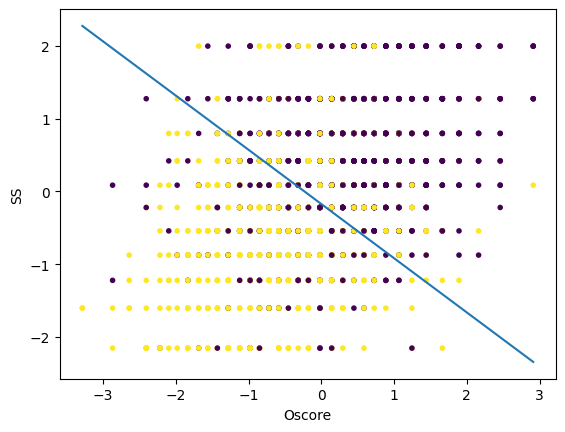

In [85]:
utils.plot_exercise_boundary(cannabis,['Oscore', 'SS'],cannabis.Cannabis)

The original Kaggle dataset has data on several drugs, not just cannabis, so you can practice even more. :) Just make sure that you choose a balanced target.

### Hints for those lost at sea of linear algebra in this exercise notebook.
You can solve the exercises 1.2 and 1.3 using a loop (calculating every term of the sum separately) or using matrices (calculating all the terms at once). The sums are over the observations - the rows of the feature array, dimension n. The result of the sum is a vector of size m+1 (number of coefficients of the model).

**Hints for exercise 1.2**

Solution using a loop:
- For every row of `var_x`, calculate the probability using the function from ex. 1, then calculate the inside the sum. The result will be a scalar.
- Do the sum.

Solution using matrices:
- Extend `var_x` by a column of 1s
- Calculate the probabilities. This includes matrix multiplication of `var_x` and `coefficients`, the result is an array of shape (n, 1). Alternatively, apply the function from ex. 1. to `var_x` using `np.apply_along_axis`
- Calculate both terms of the sum (just simple multiplication here), you will get an array of shape (n, 1) and sum the array.

**Hints for exercise 1.3**

Solution using a loop:
- Create an array of zeros for the initial coefficients of size m + 1.
- Extend `x_train` with a column of 1s.
- For every row of `x_train`, calculate the probability using the function from exercise 1 (the result is a scalar), then calculate the inside of the sum using the `x_train` row, the probability and the y_label of that row (the result is an array (1, m + 1)).
- Sum all these vectors along the columns, the result will be an array of size (1, m + 1).
- Multiply by learning rate, reshape into (m + 1,) or flatten.

Solution using matrices:
- Create a zeros array for the coefficients, size m + 1.
- Extend `x_train` with a column of 1s.
- Calculate the probabilities. This includes matrix multiplication of `x_train` and `coefficients` (reshape!), the result is an array of shape (n, 1). Alternatively, apply the function from ex. 1. to `var_x` using `np.apply_along_axis`.
- Calculate the term inside the sum (normal multiplication, reshape y_train) and do the sum. The result will be an array of size (1, m + 1).
- Multiply by the learning rate, reshape into (m + 1,) or flatten.